### Machine Learning Basics

A machine learning project would have these known steps:

1. Define Problem.
1. Prepare Data.
1. Select Algorithms.
1. Evaluate Results.
1. Present Results

start with a small dataset for Iris flower classification. 

This dataset has the following properties:

- Attributes are all numeric 
- It is a classification problem and can be used with supervised learning algorithm.
- It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
- All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.

Step :
1. Load the dataset
1. Summarize and perform some visualization on the dataset
1. Select an algorithm for classification
1. Evaluate predictions 

In [47]:
import scipy 
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [48]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Load Iris dataset

In the target column 0,1,2 to the corresponding target “setosa”, ”versicolor”, ”virginica”

In [49]:
iris = datasets.load_iris()
column_names = iris.feature_names
print(column_names)
iris.data[:5,:]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [50]:
#convert to Pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
# descriptions
print(df.describe())
# class distribution
print(df.groupby('target').size())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
target
0    50
1    50
2    50
dtype: int64


### Some visualizations

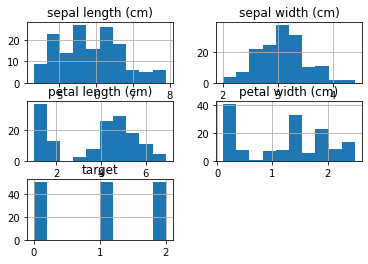

In [52]:
# histogram
df.hist()
plt.show()

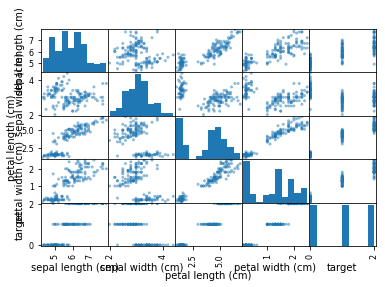

In [53]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

### Run Some Algorithms

Run some algorithm to create a model for the data. In order to evaluate the model's prediction, we split the data into 2 parts - training and testing data. 

Given two sequences, like x and y here, train_test_split() performs the split and returns four sequences (in this case NumPy arrays) in this order:

- x_train: The training part of the first sequence (x)
- x_test: The test part of the first sequence (x)
- y_train: The training part of the second sequence (y)
- y_test: The test part of the second sequence (y)

In [54]:
y = df['target']
X = df.drop(['target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [55]:
model=LogisticRegression().fit(X_train,y_train) #Fit the model according to the given training data.

### Evaluate Model

We can find out how good the model is by comparing its test prediction with the actual given values. We get the predictions from the X_test data and compare it with the actual y_test output. We can calculate the accuracy, display the confusion matrix, and so on.

In [56]:
print('Training Accuracy : ',model.score(X_train, y_train) )#Return the mean accuracy on the given data (X) and labels (y).
print('Testing Accuracy : ',model.score(X_test, y_test) )#return the mean accuracy on the given data (X) and labels (y).

Training Accuracy :  0.975
Testing Accuracy :  0.9666666666666667


In [57]:
predictions = model.predict(X_test)
print(predictions)
print(np.array(y_test))

[0 2 0 1 0 0 1 2 0 2 2 1 0 2 0 0 2 0 1 2 1 0 1 1 1 0 1 0 0 1]
[0 2 0 1 0 0 1 2 0 2 1 1 0 2 0 0 2 0 1 2 1 0 1 1 1 0 1 0 0 1]


In [58]:
# Evaluate predictions 
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) # will cover this topic later

0.9666666666666667
[[13  0  0]
 [ 0 10  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Exercise

Repeat the above with LinearRegression classifier instead of LogisticRegression. You just have to replace LogisticRegression() with LinearRegression(). Compare the results between the classifiers. Note that LinearRegression gives predictions in float values whereas the classes are denoted by integers

In [59]:
from sklearn.linear_model import LinearRegression

model2=LinearRegression().fit(X_train,y_train) #Fit the model according to the given training data.

In [60]:
model2.score(X_train, y_train) #Return the mean accuracy on the given data (X) and labels (y).

0.9264676444844051

In [61]:
model2.score(X_test, y_test) #return the mean accuracy on the given data (X) and labels (y).

0.9384791670327187

In [62]:
predictions = model2.predict(X_test)
print(predictions)
print(np.array(y_test)) #all predictions are correct?

[-3.53551134e-02  2.17178764e+00 -3.78403418e-02  8.79071146e-01
  9.06613680e-04  5.83154792e-03  8.38368973e-01  1.60637300e+00
 -3.64163476e-02  2.10287978e+00  1.56021588e+00  1.01408441e+00
 -1.04839723e-01  1.99394072e+00 -7.87290087e-02  4.70079815e-02
  1.68565488e+00  1.80059703e-03  8.42567175e-01  1.80030135e+00
  9.32782547e-01 -2.38838486e-01  1.17851260e+00  9.83291003e-01
  1.16843658e+00  1.85634730e-03  1.17853185e+00 -1.07269201e-01
  8.01327410e-02  1.39967767e+00]
[0 2 0 1 0 0 1 2 0 2 1 1 0 2 0 0 2 0 1 2 1 0 1 1 1 0 1 0 0 1]


In [63]:
predictions=np.around(predictions,decimals=0)

print(predictions)
print(np.array(y_test)) #all predictions are correct?

[-0.  2. -0.  1.  0.  0.  1.  2. -0.  2.  2.  1. -0.  2. -0.  0.  2.  0.
  1.  2.  1. -0.  1.  1.  1.  0.  1. -0.  0.  1.]
[0 2 0 1 0 0 1 2 0 2 1 1 0 2 0 0 2 0 1 2 1 0 1 1 1 0 1 0 0 1]


In [64]:
# Evaluate predictions 
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) # will cover this topic later

0.9666666666666667
[[13  0  0]
 [ 0 10  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

